# Voice Classification Pipeline - Python Script Version

## Data Understanding
### 1. Import Libraries

In [1]:
# Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

# Audio processing
import librosa
import librosa.display
import IPython.display as ipd

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


### 2. Setup Path Dataset

In [2]:
import os
parent_dataset_path = "data"  # Path utama dataset di dalam proyek

# Define paths for train and validation
train_path = os.path.join(parent_dataset_path, "train")
val_path = os.path.join(parent_dataset_path, "validation")

# Daftar kategori kelas
categories = ["buka_pria", "buka_wanita", "tutup_pria", "tutup_wanita"]

def check_and_print_structure(dataset_type, dataset_path):
    """Fungsi untuk mengecek dan menampilkan struktur dataset"""
    print(f"\n📁 {dataset_type.capitalize()} Dataset Structure:")
    
    if not os.path.exists(dataset_path):
        print(f"❌ Path '{dataset_path}' tidak ditemukan!")
        return
    
    all_exist = True
    for category in categories:
        category_path = os.path.join(dataset_path, category)
        if os.path.exists(category_path):
            print(f"  ✅ {category}/")
            wav_files = [f for f in os.listdir(category_path) if f.endswith('.wav')]
            for file in wav_files[:5]:
                print(f"     - {file}")
            if len(wav_files) > 5:
                print("     ...")
            print(f"     Total files: {len(wav_files)}")
        else:
            print(f"  ❌ Folder {category}/ tidak ditemukan!")
            all_exist = False
    
    if all_exist:
        print(f"✅ Semua folder kelas ditemukan di {dataset_type} dataset!")
    else:
        print(f"⚠️  Beberapa folder kategori hilang di {dataset_type} dataset.")

# Cek struktur train dan validation dataset
check_and_print_structure("train", train_path)
check_and_print_structure("validation", val_path)

# === Store paths untuk pemrosesan selanjutnya ===
data_paths = {
    'train': {cat: os.path.join(train_path, cat) for cat in categories},
    'validation': {cat: os.path.join(val_path, cat) for cat in categories}
}

# === Print ringkasan dataset ===
print("\n📊 Dataset Summary:")
for dataset_type in ['train', 'validation']:
    print(f"\n{dataset_type.capitalize()} Dataset:")
    for category in categories:
        path = data_paths[dataset_type][category]
        if os.path.exists(path):
            file_count = len([f for f in os.listdir(path) if f.endswith('.wav')])
            print(f"  {category}: {file_count} files")
        else:
            print(f"  {category}: ❌ Path not found")

print(f"\n✅ Data paths dictionary created successfully!")
print(f"📍 Contoh akses: data_paths['train']['buka_pria']")



📁 Train Dataset Structure:
  ✅ buka_pria/
     - buka copy 2.wav
     - buka copy 3.wav
     - buka copy 4.wav
     - buka copy 5.wav
     - buka copy 6.wav
     ...
     Total files: 50
  ✅ buka_wanita/
     - buka copy 2.wav
     - buka copy 3.wav
     - buka copy 4.wav
     - buka copy 5.wav
     - buka copy 6.wav
     ...
     Total files: 50
  ✅ tutup_pria/
     - tutup copy 2.wav
     - tutup copy 3.wav
     - tutup copy 4.wav
     - tutup copy 5.wav
     - tutup copy 6.wav
     ...
     Total files: 50
  ✅ tutup_wanita/
     - tutup copy 2.wav
     - tutup copy 3.wav
     - tutup copy 4.wav
     - tutup copy 5.wav
     - tutup copy 6.wav
     ...
     Total files: 50
✅ Semua folder kelas ditemukan di train dataset!

📁 Validation Dataset Structure:
  ✅ buka_pria/
     - buka copy 2.wav
     - buka copy 3.wav
     - buka copy 4.wav
     - buka copy.wav
     - buka.wav
     ...
     Total files: 25
  ✅ buka_wanita/
     - buka copy 2.wav
     - buka copy 3.wav
     - buka copy 4.w

### 3. Cek Distribusi Data

📊 DATA DISTRIBUTION

📊 VISUALIZATIONS:
--------------------------------------------------


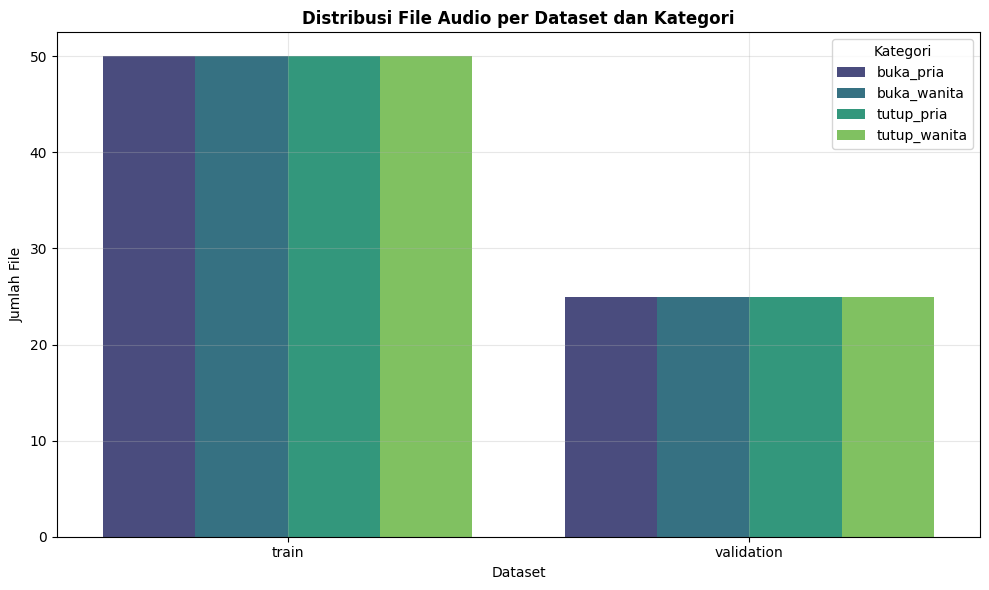

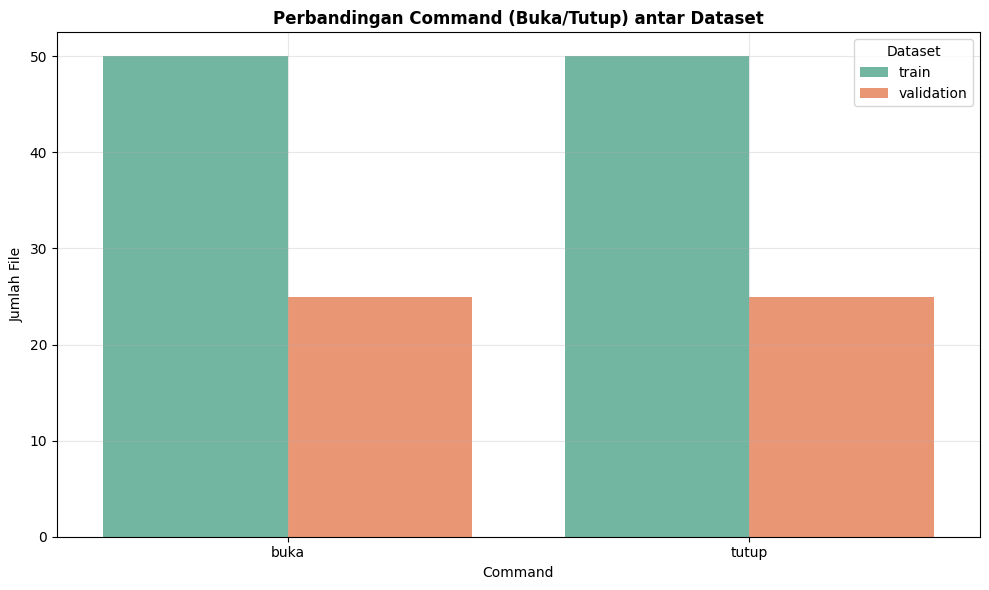

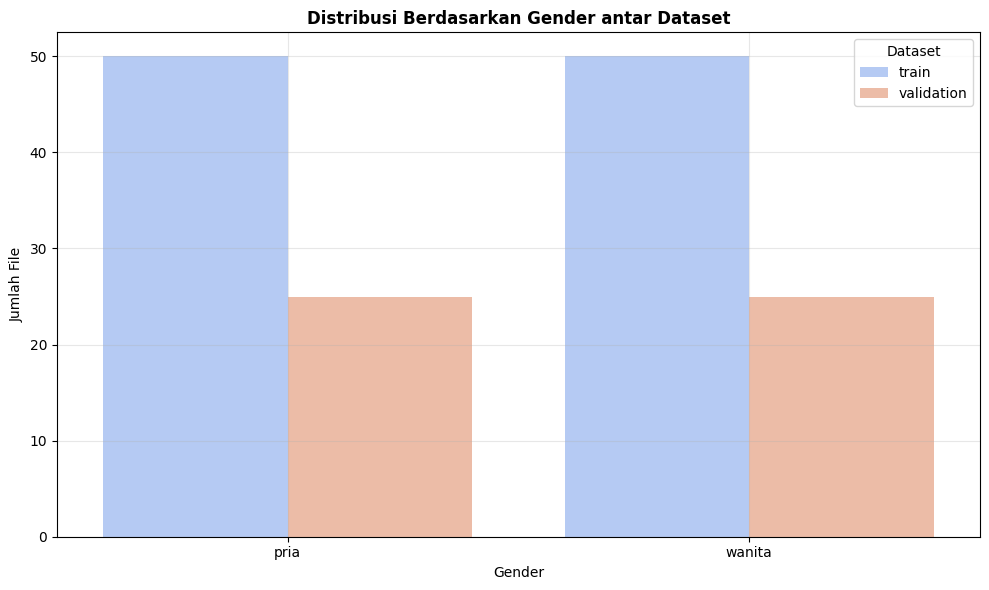


📈 DETAILED SUMMARY:

🎯 TRAIN DATASET:
------------------------------
  ├── buka_pria: 50 files (25.0%)
  ├── buka_wanita: 50 files (25.0%)
  ├── tutup_pria: 50 files (25.0%)
  ├── tutup_wanita: 50 files (25.0%)
  └── TOTAL TRAIN: 200 files

🎯 VALIDATION DATASET:
------------------------------
  ├── buka_pria: 25 files (25.0%)
  ├── buka_wanita: 25 files (25.0%)
  ├── tutup_pria: 25 files (25.0%)
  ├── tutup_wanita: 25 files (25.0%)
  └── TOTAL VALIDATION: 100 files

📊 OVERALL SUMMARY:
🎯 TOTAL TRAIN FILES: 200 files
🎯 TOTAL VALIDATION FILES: 100 files
🎯 COMBINED TOTAL: 300 audio files
📈 TRAIN/VALIDATION SPLIT: 66.7% / 33.3%


In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def check_data_distribution(data_paths):
    """Cek distribusi jumlah file audio di setiap kelas untuk train dan validation"""
    print("📊 DATA DISTRIBUTION")
    print("=" * 50)

    distribution = {}
    total_files = 0

    # Iterasi setiap jenis dataset (train, validation)
    for dataset_type, categories in data_paths.items():
        distribution[dataset_type] = {}
        dataset_total = 0

        # Iterasi setiap kategori (buka_pria, buka_wanita, dll)
        for category_name, category_path in categories.items():
            if os.path.exists(category_path):
                files = [f for f in os.listdir(category_path) if f.endswith('.wav')]
                file_count = len(files)
                distribution[dataset_type][category_name] = file_count
                dataset_total += file_count
                total_files += file_count
            else:
                distribution[dataset_type][category_name] = 0
                print(f"❌ Folder tidak ditemukan: {category_path}")
        
        distribution[dataset_type]['Dataset_Total'] = dataset_total

    # === VISUALISASI ===
    print("\n📊 VISUALIZATIONS:")
    print("-" * 50)

    plot_data = []
    for dataset_type, categories in distribution.items():
        for category, count in categories.items():
            if category != 'Dataset_Total':
                command = "buka" if "buka" in category else "tutup"
                gender = "pria" if "pria" in category else "wanita"
                plot_data.append({
                    'Dataset': dataset_type,
                    'Command': command,
                    'Gender': gender,
                    'Category': category,
                    'Count': count
                })

    if plot_data:
        plot_df = pd.DataFrame(plot_data)

        # Plot 1: Distribusi per dataset dan kategori
        plt.figure(figsize=(10, 6))
        sns.barplot(data=plot_df, x='Dataset', y='Count', hue='Category', palette='viridis')
        plt.title('Distribusi File Audio per Dataset dan Kategori', fontweight='bold')
        plt.ylabel('Jumlah File')
        plt.grid(True, alpha=0.3)
        plt.legend(title='Kategori')
        plt.tight_layout()
        plt.show()

        # Plot 2: Perbandingan antar Command (buka/tutup)
        plt.figure(figsize=(10, 6))
        sns.barplot(data=plot_df, x='Command', y='Count', hue='Dataset', palette='Set2', ci=None)
        plt.title('Perbandingan Command (Buka/Tutup) antar Dataset', fontweight='bold')
        plt.ylabel('Jumlah File')
        plt.grid(True, alpha=0.3)
        plt.legend(title='Dataset')
        plt.tight_layout()
        plt.show()

        # Plot 3: Perbandingan per Gender
        plt.figure(figsize=(10, 6))
        sns.barplot(data=plot_df, x='Gender', y='Count', hue='Dataset', palette='coolwarm', ci=None)
        plt.title('Distribusi Berdasarkan Gender antar Dataset', fontweight='bold')
        plt.ylabel('Jumlah File')
        plt.grid(True, alpha=0.3)
        plt.legend(title='Dataset')
        plt.tight_layout()
        plt.show()

    else:
        print("❌ Tidak ada data yang bisa divisualisasikan!")

    # === RINCIAN TEKS ===
    print(f"\n📈 DETAILED SUMMARY:")
    print("=" * 50)

    for dataset_type, categories in distribution.items():
        print(f"\n🎯 {dataset_type.upper()} DATASET:")
        print("-" * 30)
        dataset_total = categories['Dataset_Total']
        for category, count in categories.items():
            if category != 'Dataset_Total':
                percentage = (count / dataset_total * 100) if dataset_total > 0 else 0
                print(f"  ├── {category}: {count} files ({percentage:.1f}%)")
        print(f"  └── TOTAL {dataset_type.upper()}: {dataset_total} files")

    # === Ringkasan Total ===
    print(f"\n📊 OVERALL SUMMARY:")
    print("=" * 30)
    train_total = distribution['train']['Dataset_Total']
    val_total = distribution['validation']['Dataset_Total']
    print(f"🎯 TOTAL TRAIN FILES: {train_total} files")
    print(f"🎯 TOTAL VALIDATION FILES: {val_total} files")
    print(f"🎯 COMBINED TOTAL: {total_files} audio files")

    if total_files > 0:
        train_ratio = (train_total / total_files) * 100
        val_ratio = (val_total / total_files) * 100
        print(f"📈 TRAIN/VALIDATION SPLIT: {train_ratio:.1f}% / {val_ratio:.1f}%")

    return distribution

# === Jalankan pengecekan distribusi ===
data_dist = check_data_distribution(data_paths)


### 4. Contoh Audio + Metadata

🎵 AUDIO SAMPLES & METADATA COLLECTION

💾 Metadata disimpan ke: data\audio_metadata.csv
📊 Total file diproses: 300

📈 RINGKASAN DATASET:
------------------------------
  TRAIN: 200 file
    - buka_pria: 50
    - buka_wanita: 50
    - tutup_pria: 50
    - tutup_wanita: 50
  VALIDATION: 100 file
    - buka_pria: 25
    - buka_wanita: 25
    - tutup_pria: 25
    - tutup_wanita: 25

🎧 SAMPLE AUDIO FILES (TRAIN DATASET):
---------------------------------------------

🎵 BUKA - WANITA
   📄 File: buka4 copy 7.wav
   ⏱️ Durasi: 2.07s | 🔊 SR: 44100 Hz


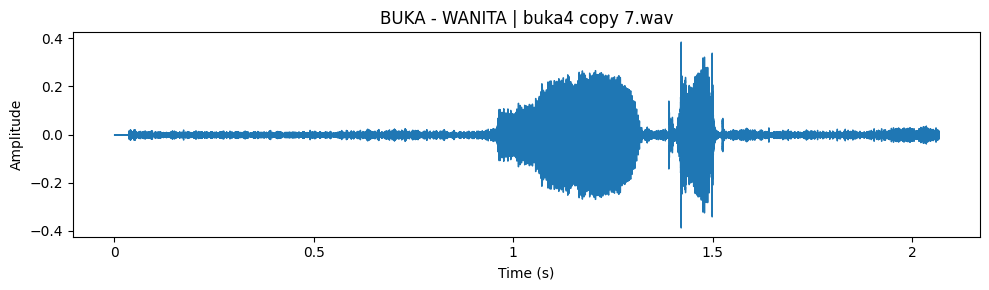


🎵 BUKA - PRIA
   📄 File: buka1 copy 7.wav
   ⏱️ Durasi: 1.88s | 🔊 SR: 44100 Hz


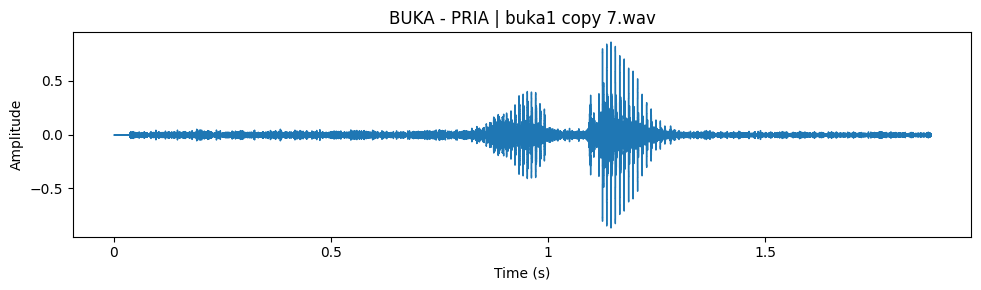


🎵 BUKA - PRIA
   📄 File: buka3 copy 2.wav
   ⏱️ Durasi: 1.83s | 🔊 SR: 44100 Hz


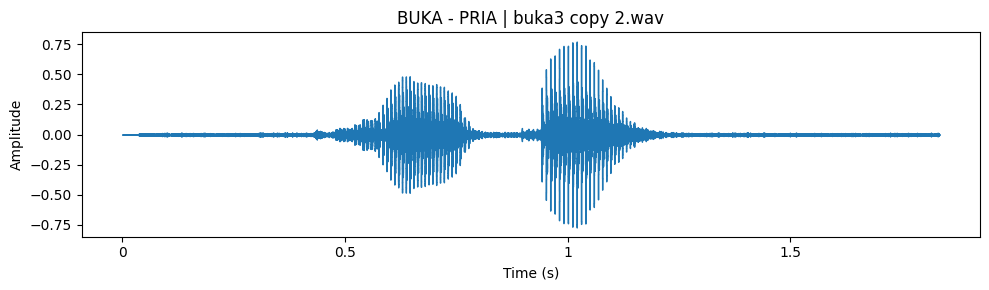


🎵 TUTUP - WANITA
   📄 File: tutup copy.wav
   ⏱️ Durasi: 1.72s | 🔊 SR: 44100 Hz


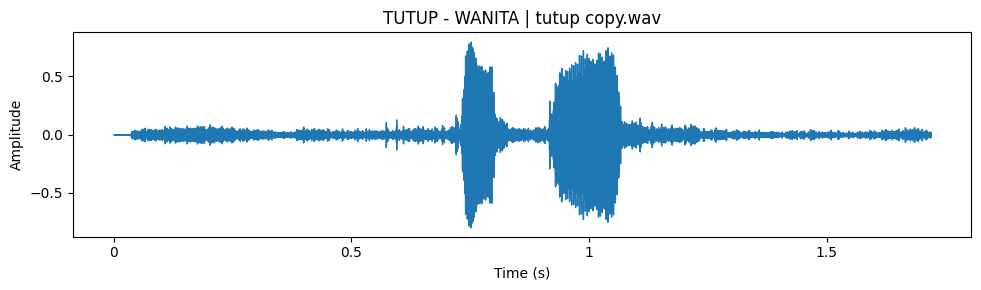


📊 STATISTIK DASAR:
-------------------------
  Rata-rata durasi: 2.13s
  Min durasi: 1.49s
  Max durasi: 2.69s
  Sample rate unik: [44100 48000]


In [4]:
import os
import pandas as pd
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt

BASE_DIR = "data"

def display_samples_and_save_metadata(base_dir=BASE_DIR):
    """Menampilkan sampel audio & menyimpan metadata ke CSV dari struktur folder data/train dan data/validation"""
    print("🎵 AUDIO SAMPLES & METADATA COLLECTION")
    print("=" * 60)

    dataset_types = ["train", "validation"]
    categories = ["buka_pria", "buka_wanita", "tutup_pria", "tutup_wanita"]
    audio_metadata = []

    # Loop setiap dataset dan kategori
    for dataset_type in dataset_types:
        for category in categories:
            category_path = os.path.join(base_dir, dataset_type, category)

            if not os.path.exists(category_path):
                print(f"⚠️ Folder tidak ditemukan: {category_path}")
                continue

            files = [f for f in os.listdir(category_path) if f.endswith(".wav")]

            for file in files:
                file_path = os.path.join(category_path, file)
                try:
                    y, sr = librosa.load(file_path, sr=None)
                    duration = librosa.get_duration(y=y, sr=sr)

                    # Ekstrak jenis perintah & gender
                    if "buka" in category:
                        command = "buka"
                    else:
                        command = "tutup"

                    if "pria" in category:
                        speaker = "pria"
                    else:
                        speaker = "wanita"

                    audio_metadata.append({
                        "filename": file,
                        "file_path": file_path,
                        "dataset_type": dataset_type,
                        "speaker": speaker,
                        "command": command,
                        "duration": duration,
                        "sample_rate": sr,
                        "num_samples": len(y)
                    })

                except Exception as e:
                    print(f"❌ Error processing {file_path}: {e}")

    # Konversi ke DataFrame
    metadata_df = pd.DataFrame(audio_metadata)
    if metadata_df.empty:
        print("❌ Tidak ada metadata yang berhasil dikumpulkan.")
        return pd.DataFrame()

    # Simpan ke CSV
    csv_filename = os.path.join(base_dir, "audio_metadata.csv")
    metadata_df.to_csv(csv_filename, index=False)
    print(f"\n💾 Metadata disimpan ke: {csv_filename}")
    print(f"📊 Total file diproses: {len(metadata_df)}")

    # Tampilkan ringkasan dataset
    print("\n📈 RINGKASAN DATASET:")
    print("-" * 30)
    for dataset_type in dataset_types:
        subset = metadata_df[metadata_df["dataset_type"] == dataset_type]
        print(f"  {dataset_type.upper()}: {len(subset)} file")
        for command in ["buka", "tutup"]:
            for speaker in ["pria", "wanita"]:
                count = len(subset[(subset["command"] == command) & (subset["speaker"] == speaker)])
                print(f"    - {command}_{speaker}: {count}")

    # Tampilkan 4 sampel audio acak dari TRAIN
    print("\n🎧 SAMPLE AUDIO FILES (TRAIN DATASET):")
    print("-" * 45)
    train_samples = metadata_df[metadata_df["dataset_type"] == "train"].sample(n=min(4, len(metadata_df)), random_state=42)

    for _, sample in train_samples.iterrows():
        print(f"\n🎵 {sample['command'].upper()} - {sample['speaker'].upper()}")
        print(f"   📄 File: {sample['filename']}")
        print(f"   ⏱️ Durasi: {sample['duration']:.2f}s | 🔊 SR: {sample['sample_rate']} Hz")

        try:
            y, sr = librosa.load(sample['file_path'], sr=None)
            ipd.display(ipd.Audio(y, rate=sr))

            plt.figure(figsize=(10, 3))
            librosa.display.waveshow(y, sr=sr)
            plt.title(f"{sample['command'].upper()} - {sample['speaker'].upper()} | {sample['filename']}")
            plt.xlabel("Time (s)")
            plt.ylabel("Amplitude")
            plt.tight_layout()
            plt.show()
        except Exception as e:
            print(f"❌ Gagal menampilkan waveform: {e}")

    # Statistik tambahan
    print("\n📊 STATISTIK DASAR:")
    print("-" * 25)
    print(f"  Rata-rata durasi: {metadata_df['duration'].mean():.2f}s")
    print(f"  Min durasi: {metadata_df['duration'].min():.2f}s")
    print(f"  Max durasi: {metadata_df['duration'].max():.2f}s")
    print(f"  Sample rate unik: {metadata_df['sample_rate'].unique()}")

    return metadata_df

# Jalankan fungsi
metadata_df = display_samples_and_save_metadata()


### 5. Analisis Durasi dan Sample Rate

⏱️ DURATION & SAMPLE RATE ANALYSIS


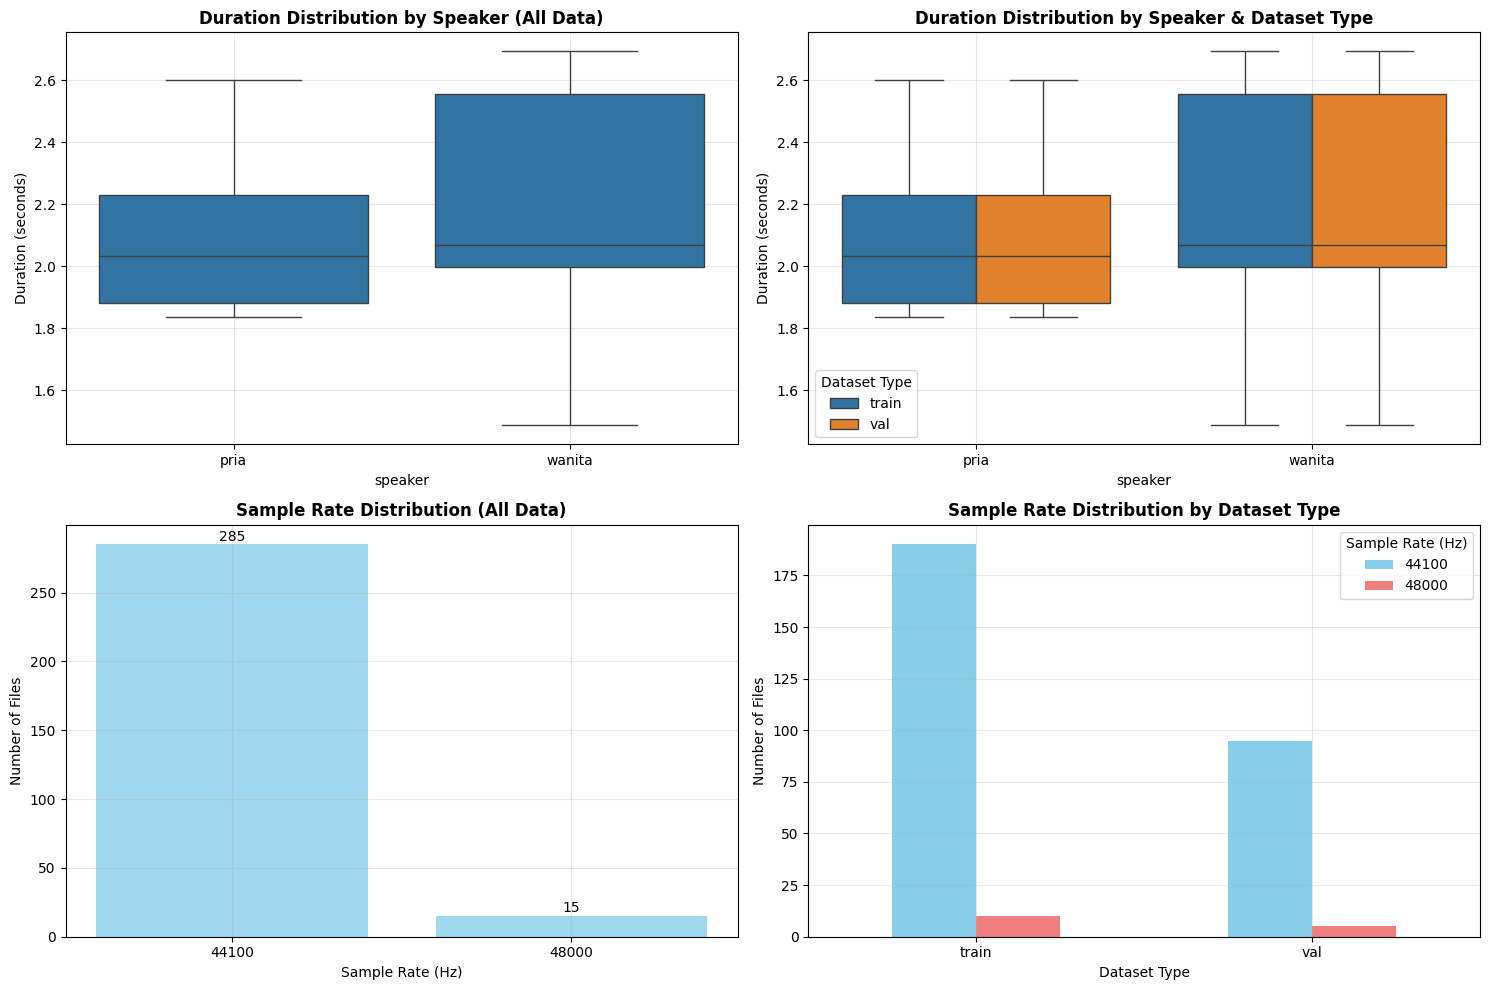


📊 DURATION STATISTICS (ALL DATA):
-----------------------------------
         count   mean    std    min    25%    50%    75%    max
speaker                                                        
pria     150.0  2.099  0.259  1.834  1.881  2.032  2.229  2.601
wanita   150.0  2.169  0.380  1.486  1.997  2.067  2.554  2.694

📊 DURATION STATISTICS (TRAIN):
         count   mean   std    min    25%    50%    75%    max
speaker                                                       
pria     100.0  2.099  0.26  1.834  1.881  2.032  2.229  2.601
wanita   100.0  2.169  0.38  1.486  1.997  2.067  2.554  2.694

📊 DURATION STATISTICS (VAL):
         count   mean    std    min    25%    50%    75%    max
speaker                                                        
pria      50.0  2.099  0.261  1.834  1.881  2.032  2.229  2.601
wanita    50.0  2.169  0.382  1.486  1.997  2.067  2.554  2.694

🎯 SAMPLE RATES ANALYSIS:
-------------------------
Unique sample rates: [44100 48000]


In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa

# === Bagian 1: Load semua file audio dari struktur folder ===
def load_audio_metadata(base_dir="data"):
    """
    Load semua file audio dari struktur folder:
      data/train/... dan data/validation/...
    Return: DataFrame dengan kolom:
      filename, filepath, label, speaker, dataset_type, duration, sample_rate
    """
    metadata = []

    # Hanya dua subset dataset: train dan validation
    for dataset_type in ["train", "validation"]:
        dataset_path = os.path.join(base_dir, dataset_type)
        if not os.path.exists(dataset_path):
            print(f"⚠️ Folder {dataset_path} tidak ditemukan, dilewati.")
            continue

        for label in os.listdir(dataset_path):
            label_path = os.path.join(dataset_path, label)
            if not os.path.isdir(label_path):
                continue

            # speaker dari nama folder (contoh: "buka_pria" -> "pria")
            if "pria" in label.lower():
                speaker = "pria"
            elif "wanita" in label.lower():
                speaker = "wanita"
            else:
                speaker = "unknown"

            for filename in os.listdir(label_path):
                if filename.lower().endswith(".wav"):
                    filepath = os.path.join(label_path, filename)
                    try:
                        y, sr = librosa.load(filepath, sr=None)
                        duration = librosa.get_duration(y=y, sr=sr)
                        metadata.append({
                            "filename": filename,
                            "filepath": filepath,
                            "label": label,
                            "speaker": speaker,
                            "dataset_type": "train" if dataset_type == "train" else "val",
                            "duration": duration,
                            "sample_rate": sr
                        })
                    except Exception as e:
                        print(f"❌ Gagal memproses {filepath}: {e}")

    return pd.DataFrame(metadata)


# === Bagian 2: Fungsi analisis durasi & sample rate ===
def analyze_duration_sample_rate(audio_df):
    """Analyze duration and sample rate distribution from the dataframe"""
    print("⏱️ DURATION & SAMPLE RATE ANALYSIS")
    print("=" * 50)

    if audio_df.empty:
        print("❌ No audio data for analysis!")
        return pd.DataFrame()

    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Plot 1: Duration distribution by speaker (all datasets)
    sns.boxplot(data=audio_df, x='speaker', y='duration', ax=axes[0, 0])
    axes[0, 0].set_title('Duration Distribution by Speaker (All Data)', fontweight='bold')
    axes[0, 0].set_ylabel('Duration (seconds)')
    axes[0, 0].grid(True, alpha=0.3)

    # Plot 2: Duration distribution by speaker and dataset type
    sns.boxplot(data=audio_df, x='speaker', y='duration', hue='dataset_type', ax=axes[0, 1])
    axes[0, 1].set_title('Duration Distribution by Speaker & Dataset Type', fontweight='bold')
    axes[0, 1].set_ylabel('Duration (seconds)')
    axes[0, 1].grid(True, alpha=0.3)
    axes[0, 1].legend(title='Dataset Type')

    # Plot 3: Sample rate distribution
    sample_rate_counts = audio_df['sample_rate'].value_counts().sort_index()
    bars = axes[1, 0].bar(sample_rate_counts.index.astype(str), sample_rate_counts.values, color='skyblue', alpha=0.8)
    axes[1, 0].set_title('Sample Rate Distribution (All Data)', fontweight='bold')
    axes[1, 0].set_xlabel('Sample Rate (Hz)')
    axes[1, 0].set_ylabel('Number of Files')
    axes[1, 0].grid(True, alpha=0.3)
    for bar, value in zip(bars, sample_rate_counts.values):
        axes[1, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, str(value), ha='center', va='bottom')

    # Plot 4: Sample rate by dataset type
    sample_rate_by_dataset = audio_df.groupby(['dataset_type', 'sample_rate']).size().unstack(fill_value=0)
    sample_rate_by_dataset.plot(kind='bar', ax=axes[1, 1], color=['skyblue', 'lightcoral'])
    axes[1, 1].set_title('Sample Rate Distribution by Dataset Type', fontweight='bold')
    axes[1, 1].set_xlabel('Dataset Type')
    axes[1, 1].set_ylabel('Number of Files')
    axes[1, 1].grid(True, alpha=0.3)
    axes[1, 1].legend(title='Sample Rate (Hz)')
    plt.xticks(rotation=0)

    plt.tight_layout()
    plt.show()

    # Statistik durasi
    print("\n📊 DURATION STATISTICS (ALL DATA):")
    print("-" * 35)
    print(audio_df.groupby('speaker')['duration'].describe().round(3))

    # Statistik per dataset
    for dtype in audio_df['dataset_type'].unique():
        subset = audio_df[audio_df['dataset_type'] == dtype]
        print(f"\n📊 DURATION STATISTICS ({dtype.upper()}):")
        print(subset.groupby('speaker')['duration'].describe().round(3))

    # Statistik sample rate
    print(f"\n🎯 SAMPLE RATES ANALYSIS:")
    print("-" * 25)
    print(f"Unique sample rates: {audio_df['sample_rate'].unique()}")

    return audio_df


# === Bagian 3: Jalankan ===
metadata_df = load_audio_metadata(base_dir="data")

if not metadata_df.empty:
    audio_df = analyze_duration_sample_rate(metadata_df)
else:
    print("❌ Tidak ada data audio ditemukan di folder data/.")


### 6. Deteksi Missing Value dan Outlier

In [6]:
import pandas as pd
import numpy as np
import os
import librosa

def detect_missing_values_outliers(base_data_path="data"):
    print("🔍 DETECTING MISSING VALUES & OUTLIERS")
    print("=" * 60)

    metadata_list = []

    # Loop untuk dataset_type = train dan validation
    for dataset_type in ["train", "validation"]:
        dataset_path = os.path.join(base_data_path, dataset_type)

        if not os.path.exists(dataset_path):
            print(f"⚠️ Folder tidak ditemukan: {dataset_path}")
            continue

        # Loop kategori (buka_pria, buka_wanita, dst)
        for category in os.listdir(dataset_path):
            category_path = os.path.join(dataset_path, category)
            if not os.path.isdir(category_path):
                continue

            wav_files = [f for f in os.listdir(category_path) if f.endswith(".wav")]

            for file in wav_files:
                file_path = os.path.join(category_path, file)

                try:
                    y, sr = librosa.load(file_path, sr=None)
                    duration = librosa.get_duration(y=y, sr=sr)

                    # Pisahkan "buka"/"tutup" dan "pria"/"wanita"
                    if "_" in category:
                        command, speaker = category.split("_", 1)
                    else:
                        command, speaker = category, "unknown"

                    metadata = {
                        "filename": file,
                        "dataset_type": dataset_type,
                        "speaker": speaker,
                        "command": command,
                        "duration": duration,
                        "sample_rate": sr,
                        "num_samples": len(y),
                        "rms_energy": np.sqrt(np.mean(y ** 2)),
                        "path": file_path
                    }
                    metadata_list.append(metadata)

                except Exception as e:
                    print(f"❌ Error processing {file_path}: {e}")
                    continue

    # Buat DataFrame
    metadata_df = pd.DataFrame(metadata_list)

    if metadata_df.empty:
        print("❌ No data collected for analysis!")
        return pd.DataFrame()

    print(f"\n📊 DATASET SUMMARY")
    print("-" * 60)
    print(f"Total files analyzed: {len(metadata_df)}")
    print(f"Train files: {len(metadata_df[metadata_df['dataset_type'] == 'train'])}")
    print(f"Validation files: {len(metadata_df[metadata_df['dataset_type'] == 'validation'])}")

    # --- Missing Values ---
    print("\n❌ MISSING VALUES CHECK")
    print("-" * 60)
    missing_data = metadata_df.isnull().sum()
    missing_info = missing_data[missing_data > 0]

    if missing_info.empty:
        print("✅ No missing values found!")
    else:
        print(missing_info)

    # --- Outlier Detection (IQR) ---
    print("\n📈 OUTLIER DETECTION (IQR method)")
    print("-" * 60)
    numerical_cols = ["duration", "sample_rate", "num_samples", "rms_energy"]

    for col in numerical_cols:
        Q1 = metadata_df[col].quantile(0.25)
        Q3 = metadata_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers = metadata_df[(metadata_df[col] < lower) | (metadata_df[col] > upper)]

        print(f"\n📊 {col.upper()}:")
        print(f"   Q1={Q1:.3f}, Q3={Q3:.3f}, IQR={IQR:.3f}")
        print(f"   Range: [{lower:.3f}, {upper:.3f}]")
        print(f"   Outliers: {len(outliers)} files ({len(outliers)/len(metadata_df)*100:.1f}%)")

        if not outliers.empty:
            for i, row in outliers.head(3).iterrows():
                print(f"     - {row['filename']} ({row['dataset_type']} - {row['command']} - {row['speaker']})")
            if len(outliers) > 3:
                print(f"     ... and {len(outliers)-3} more")

    # --- Sample Rate Check ---
    print("\n🔊 SAMPLE RATE CONSISTENCY CHECK")
    print("-" * 60)
    unique_sr = metadata_df["sample_rate"].unique()
    print(f"Unique sample rates: {unique_sr}")

    if len(unique_sr) == 1:
        print("✅ All files have consistent sample rate.")
    else:
        print("⚠️ Multiple sample rates detected:")
        for sr in unique_sr:
            count = len(metadata_df[metadata_df["sample_rate"] == sr])
            print(f"   {sr} Hz: {count} files")

    print("\n✅ ANALYSIS COMPLETED.")
    return metadata_df


# Jalankan analisis
metadata_df = detect_missing_values_outliers("data")


🔍 DETECTING MISSING VALUES & OUTLIERS

📊 DATASET SUMMARY
------------------------------------------------------------
Total files analyzed: 300
Train files: 200
Validation files: 100

❌ MISSING VALUES CHECK
------------------------------------------------------------
✅ No missing values found!

📈 OUTLIER DETECTION (IQR method)
------------------------------------------------------------

📊 DURATION:
   Q1=1.916, Q3=2.473, IQR=0.557
   Range: [1.080, 3.309]
   Outliers: 0 files (0.0%)

📊 SAMPLE_RATE:
   Q1=44100.000, Q3=44100.000, IQR=0.000
   Range: [44100.000, 44100.000]
   Outliers: 15 files (5.0%)
     - buka4 copy 2.wav (train - buka - pria)
     - buka4 copy 3.wav (train - buka - pria)
     - buka4 copy 4.wav (train - buka - pria)
     ... and 12 more

📊 NUM_SAMPLES:
   Q1=86528.000, Q3=109056.000, IQR=22528.000
   Range: [52736.000, 142848.000]
   Outliers: 0 files (0.0%)

📊 RMS_ENERGY:
   Q1=0.056, Q3=0.111, IQR=0.056
   Range: [-0.028, 0.195]
   Outliers: 0 files (0.0%)

🔊 SAMP

## Preprocessing
### 1. Import & Load Data

In [7]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import librosa.display
from sklearn.preprocessing import StandardScaler, LabelEncoder
import joblib
import seaborn as sns
import os

print("✅ Libraries imported!")

# Base path untuk data folder
BASE_DIR = "data"
METADATA_PATH = os.path.join(BASE_DIR, "audio_metadata.csv")

# Load metadata
try:
    metadata_df = pd.read_csv(METADATA_PATH)
    print(f"📊 Loaded {len(metadata_df)} audio files from {METADATA_PATH}")
    
    # Check available columns
    print(f"\n📋 AVAILABLE COLUMNS: {list(metadata_df.columns)}")
    
    # Tampilkan preview kolom sesuai ketersediaan
    if all(col in metadata_df.columns for col in ['filename', 'dataset_type', 'speaker', 'command', 'duration']):
        print("\n📊 METADATA PREVIEW:")
        print(metadata_df[['filename', 'dataset_type', 'speaker', 'command', 'duration']].head())
    elif all(col in metadata_df.columns for col in ['filename', 'speaker', 'command', 'duration']):
        print("\n📊 METADATA PREVIEW:")
        print(metadata_df[['filename', 'speaker', 'command', 'duration']].head())
    elif 'filename' in metadata_df.columns:
        available_cols = ['filename'] + [
            col for col in ['dataset_type', 'speaker', 'command', 'duration'] 
            if col in metadata_df.columns
        ]
        print(f"\n📊 METADATA PREVIEW (available columns):")
        print(metadata_df[available_cols].head())
    else:
        print("\n📊 METADATA PREVIEW:")
        print(metadata_df.head())
        
    # Distribusi dataset
    if 'dataset_type' in metadata_df.columns:
        print(f"\n📈 DATASET DISTRIBUTION:")
        for dataset_type in metadata_df['dataset_type'].unique():
            count = len(metadata_df[metadata_df['dataset_type'] == dataset_type])
            print(f"   {dataset_type}: {count} files")
    
    if 'speaker' in metadata_df.columns:
        print(f"\n👥 SPEAKER DISTRIBUTION:")
        for speaker in metadata_df['speaker'].unique():
            count = len(metadata_df[metadata_df['speaker'] == speaker])
            print(f"   {speaker}: {count} files")
    
    if 'command' in metadata_df.columns:
        print(f"\n🎯 COMMAND DISTRIBUTION:")
        for command in metadata_df['command'].unique():
            count = len(metadata_df[metadata_df['command'] == command])
            print(f"   {command}: {count} files")
            
except FileNotFoundError:
    print(f"❌ File not found: {METADATA_PATH}")
    print("💡 Please check that 'audio_metadata.csv' exists inside the 'data' folder.")
    metadata_df = pd.DataFrame()
except Exception as e:
    print(f"❌ Error loading metadata: {e}")
    metadata_df = pd.DataFrame()


✅ Libraries imported!
📊 Loaded 300 audio files from data\audio_metadata.csv

📋 AVAILABLE COLUMNS: ['filename', 'file_path', 'dataset_type', 'speaker', 'command', 'duration', 'sample_rate', 'num_samples']

📊 METADATA PREVIEW:
          filename dataset_type speaker command  duration
0  buka copy 2.wav        train    pria    buka  1.973696
1  buka copy 3.wav        train    pria    buka  1.973696
2  buka copy 4.wav        train    pria    buka  1.973696
3  buka copy 5.wav        train    pria    buka  1.973696
4  buka copy 6.wav        train    pria    buka  1.973696

📈 DATASET DISTRIBUTION:
   train: 200 files
   validation: 100 files

👥 SPEAKER DISTRIBUTION:
   pria: 150 files
   wanita: 150 files

🎯 COMMAND DISTRIBUTION:
   buka: 150 files
   tutup: 150 files


### 2. Visualisasi Distribusi Durasi

📈 VISUALISASI DISTRIBUSI DURASI
📊 Loaded 300 audio files from data\audio_metadata.csv
📋 Kolom yang tersedia: ['filename', 'file_path', 'dataset_type', 'speaker', 'command', 'duration', 'sample_rate', 'num_samples']


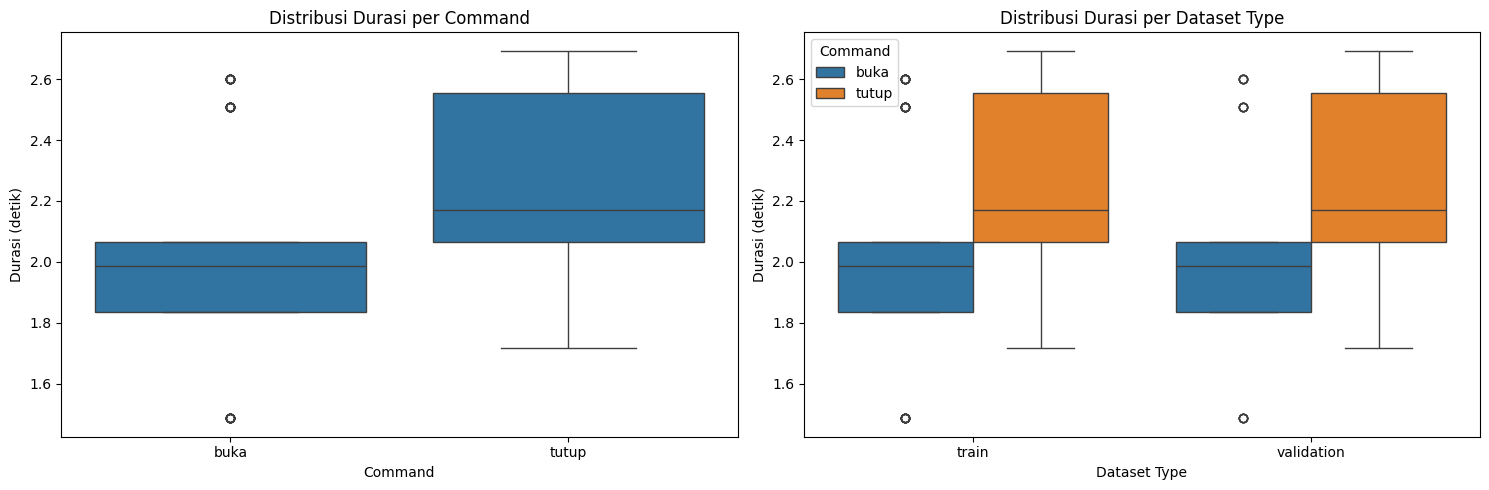


📊 STATISTIK DURASI:
         count   mean    std    min    25%    50%    75%    max
command                                                        
buka     150.0  2.022  0.310  1.486  1.835  1.985  2.067  2.601
tutup    150.0  2.245  0.305  1.718  2.067  2.171  2.554  2.694

📊 STATISTIK DURASI PER DATASET TYPE:

🎯 TRAIN:
         count   mean    std    min    25%    50%    75%    max
command                                                        
buka     100.0  2.022  0.310  1.486  1.835  1.985  2.067  2.601
tutup    100.0  2.245  0.305  1.718  2.067  2.171  2.554  2.694

🎯 VALIDATION:
         count   mean    std    min    25%    50%    75%    max
command                                                        
buka      50.0  2.022  0.312  1.486  1.835  1.985  2.067  2.601
tutup     50.0  2.245  0.307  1.718  2.067  2.171  2.554  2.694

📈 VISUALISASI TAMBAHAN: DISTRIBUSI DURASI PER SPEAKER


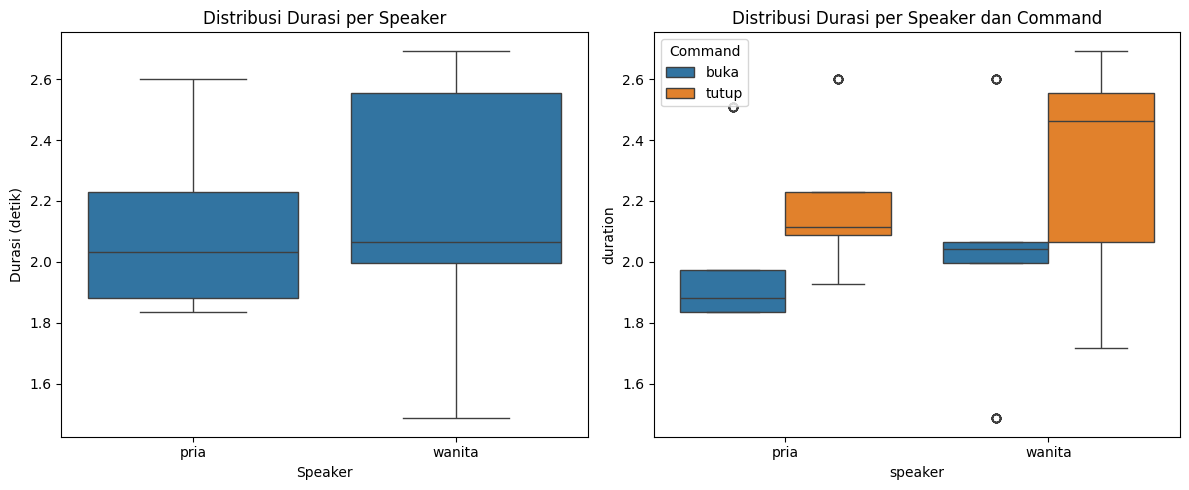


📊 STATISTIK DURASI PER SPEAKER:
         count   mean    std    min    25%    50%    75%    max
speaker                                                        
pria     150.0  2.099  0.259  1.834  1.881  2.032  2.229  2.601
wanita   150.0  2.169  0.380  1.486  1.997  2.067  2.554  2.694


In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Base path
BASE_DIR = "data"
METADATA_PATH = os.path.join(BASE_DIR, "audio_metadata.csv")

print("📈 VISUALISASI DISTRIBUSI DURASI")
print("=" * 40)

# Pastikan file metadata ada
if not os.path.exists(METADATA_PATH):
    print(f"❌ File metadata tidak ditemukan di: {METADATA_PATH}")
    print("💡 Pastikan file 'audio_metadata.csv' berada di dalam folder 'data/'")
else:
    # Load metadata
    metadata_df = pd.read_csv(METADATA_PATH)
    print(f"📊 Loaded {len(metadata_df)} audio files from {METADATA_PATH}")
    print(f"📋 Kolom yang tersedia: {list(metadata_df.columns)}")

    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # --- Plot 1: Distribusi durasi per command ---
    if 'command' in metadata_df.columns and 'duration' in metadata_df.columns:
        sns.boxplot(data=metadata_df, x='command', y='duration', ax=axes[0])
        axes[0].set_title('Distribusi Durasi per Command')
        axes[0].set_ylabel('Durasi (detik)')
        axes[0].set_xlabel('Command')
    else:
        axes[0].text(0.5, 0.5, 'Data command tidak tersedia', 
                    ha='center', va='center', transform=axes[0].transAxes)
        axes[0].set_title('Distribusi Durasi per Command')

    # --- Plot 2: Distribusi durasi per dataset_type ---
    if 'dataset_type' in metadata_df.columns and 'duration' in metadata_df.columns:
        if 'command' in metadata_df.columns:
            sns.boxplot(data=metadata_df, x='dataset_type', y='duration', hue='command', ax=axes[1])
            axes[1].legend(title='Command')
        else:
            sns.boxplot(data=metadata_df, x='dataset_type', y='duration', ax=axes[1])
        axes[1].set_title('Distribusi Durasi per Dataset Type')
        axes[1].set_ylabel('Durasi (detik)')
        axes[1].set_xlabel('Dataset Type')
    else:
        axes[1].text(0.5, 0.5, 'Data dataset_type tidak tersedia', 
                    ha='center', va='center', transform=axes[1].transAxes)
        axes[1].set_title('Distribusi Durasi per Dataset Type')

    plt.tight_layout()
    plt.show()

    # --- Statistik durasi ---
    print("\n📊 STATISTIK DURASI:")
    if 'command' in metadata_df.columns and 'duration' in metadata_df.columns:
        duration_stats = metadata_df.groupby('command')['duration'].describe()
        print(duration_stats.round(3))
        
        if 'dataset_type' in metadata_df.columns:
            print(f"\n📊 STATISTIK DURASI PER DATASET TYPE:")
            for dataset_type in metadata_df['dataset_type'].unique():
                print(f"\n🎯 {dataset_type.upper()}:")
                dataset_stats = metadata_df[metadata_df['dataset_type'] == dataset_type].groupby('command')['duration'].describe()
                print(dataset_stats.round(3))
    else:
        print("❌ Data 'command' atau 'duration' tidak tersedia untuk statistik")
        if 'duration' in metadata_df.columns:
            print("\n📊 STATISTIK DURASI KESELURUHAN:")
            print(metadata_df['duration'].describe().round(3))

    # --- Visualisasi tambahan: per speaker ---
    if 'speaker' in metadata_df.columns and 'duration' in metadata_df.columns:
        print(f"\n📈 VISUALISASI TAMBAHAN: DISTRIBUSI DURASI PER SPEAKER")
        
        plt.figure(figsize=(12, 5))
        
        plt.subplot(1, 2, 1)
        sns.boxplot(data=metadata_df, x='speaker', y='duration')
        plt.title('Distribusi Durasi per Speaker')
        plt.ylabel('Durasi (detik)')
        plt.xlabel('Speaker')
        
        plt.subplot(1, 2, 2)
        if 'command' in metadata_df.columns:
            sns.boxplot(data=metadata_df, x='speaker', y='duration', hue='command')
            plt.legend(title='Command')
            plt.title('Distribusi Durasi per Speaker dan Command')
        else:
            sns.violinplot(data=metadata_df, x='speaker', y='duration')
            plt.title('Distribusi Durasi per Speaker (Violin Plot)')
        
        plt.tight_layout()
        plt.show()
        
        # Statistik tambahan per speaker
        print(f"\n📊 STATISTIK DURASI PER SPEAKER:")
        speaker_stats = metadata_df.groupby('speaker')['duration'].describe()
        print(speaker_stats.round(3))


### 3. Extract Features

In [9]:
import os
import numpy as np
import librosa

def extract_features(file_path, sr=22050, n_mfcc=13):
    """Extract features dari audio file"""
    try:
        y, sr = librosa.load(file_path, sr=sr)
        
        # MFCC features
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
        mfcc_mean = np.mean(mfcc, axis=1)
        mfcc_std = np.std(mfcc, axis=1)
        
        # Additional features
        spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
        zero_crossing_rate = np.mean(librosa.feature.zero_crossing_rate(y))
        chroma_stft = np.mean(librosa.feature.chroma_stft(y=y, sr=sr))
        rms_energy = np.mean(librosa.feature.rms(y=y))
        
        # Combine features
        features = np.concatenate([
            mfcc_mean,
            mfcc_std,
            [spectral_centroid, zero_crossing_rate, chroma_stft, rms_energy]
        ])
        
        return features
        
    except Exception as e:
        print(f"❌ Error processing {file_path}: {e}")
        return None

print("🔧 EXTRACTING FEATURES...")
print("=" * 40)

# Check available columns
print(f"📋 Available columns: {list(metadata_df.columns)}")

features = []
labels = []
file_paths = []
failed_files = []

# Tentukan kolom label target
if 'command' in metadata_df.columns:
    target_column = 'command'
    print("🎯 Using 'command' column as labels")
elif 'class' in metadata_df.columns:
    target_column = 'class'
    print("🎯 Using 'class' column as labels")
else:
    print("❌ No suitable label column found! Available columns:", list(metadata_df.columns))
    X, y = np.array([]), np.array([])

# Pastikan ada kolom file_path
if 'file_path' not in metadata_df.columns:
    print("💡 Reconstructing file paths based on new data structure...")

    base_dir = "data"
    if all(col in metadata_df.columns for col in ['filename', 'dataset_type', 'command']):
        # Contoh: data/train/buka_pria/audio1.wav
        metadata_df['file_path'] = metadata_df.apply(
            lambda row: os.path.join(
                base_dir,
                row['dataset_type'],        # train / validation
                row['command'],             # buka_pria / tutup_wanita
                row['filename']
            ),
            axis=1
        )
    else:
        print("❌ Cannot reconstruct file paths. Missing required columns.")
        X, y = np.array([]), np.array([])

if 'file_path' in metadata_df.columns and 'target_column' in locals():
    for idx, row in metadata_df.iterrows():
        if idx % 50 == 0:
            print(f"📁 Processed {idx}/{len(metadata_df)} files...")

        feature_vector = extract_features(row['file_path'])
        if feature_vector is not None:
            features.append(feature_vector)
            labels.append(row[target_column])
            file_paths.append(row['file_path'])
        else:
            failed_files.append(row['file_path'])
    
    if features:
        X = np.array(features)
        y = np.array(labels)
        
        print(f"\n✅ Feature extraction completed!")
        print(f"📊 Features shape: {X.shape}")
        print(f"🎯 Labels shape: {y.shape}")
        print(f"📁 Successful files: {len(features)}")
        print(f"❌ Failed files: {len(failed_files)}")
        
        if failed_files:
            print(f"\n⚠️  Failed to process these files:")
            for failed_file in failed_files[:5]:
                print(f"   - {failed_file}")
            if len(failed_files) > 5:
                print(f"   ... and {len(failed_files) - 5} more")
        
        print(f"\n📈 LABEL DISTRIBUTION:")
        unique_labels, counts = np.unique(y, return_counts=True)
        for label, count in zip(unique_labels, counts):
            percentage = (count / len(y)) * 100
            print(f"   {label}: {count} files ({percentage:.1f}%)")
        
        print(f"\n📊 FEATURE STATISTICS:")
        print(f"   Number of features: {X.shape[1]}")
        print(f"   Feature range: [{X.min():.3f}, {X.max():.3f}]")
        print(f"   Mean: {X.mean():.3f}, Std: {X.std():.3f}")
        
    else:
        print("❌ No features extracted successfully!")
        X, y = np.array([]), np.array([])
else:
    print("❌ Cannot proceed with feature extraction due to missing data.")
    X, y = np.array([]), np.array([])


🔧 EXTRACTING FEATURES...
📋 Available columns: ['filename', 'file_path', 'dataset_type', 'speaker', 'command', 'duration', 'sample_rate', 'num_samples']
🎯 Using 'command' column as labels
📁 Processed 0/300 files...
📁 Processed 50/300 files...
📁 Processed 100/300 files...
📁 Processed 150/300 files...
📁 Processed 200/300 files...
📁 Processed 250/300 files...

✅ Feature extraction completed!
📊 Features shape: (300, 30)
🎯 Labels shape: (300,)
📁 Successful files: 300
❌ Failed files: 0

📈 LABEL DISTRIBUTION:
   buka: 150 files (50.0%)
   tutup: 150 files (50.0%)

📊 FEATURE STATISTICS:
   Number of features: 30
   Feature range: [-427.533, 3414.282]
   Mean: 64.207, Std: 356.158


### 5. Visualisasi Features

📊 VISUALISASI FEATURES


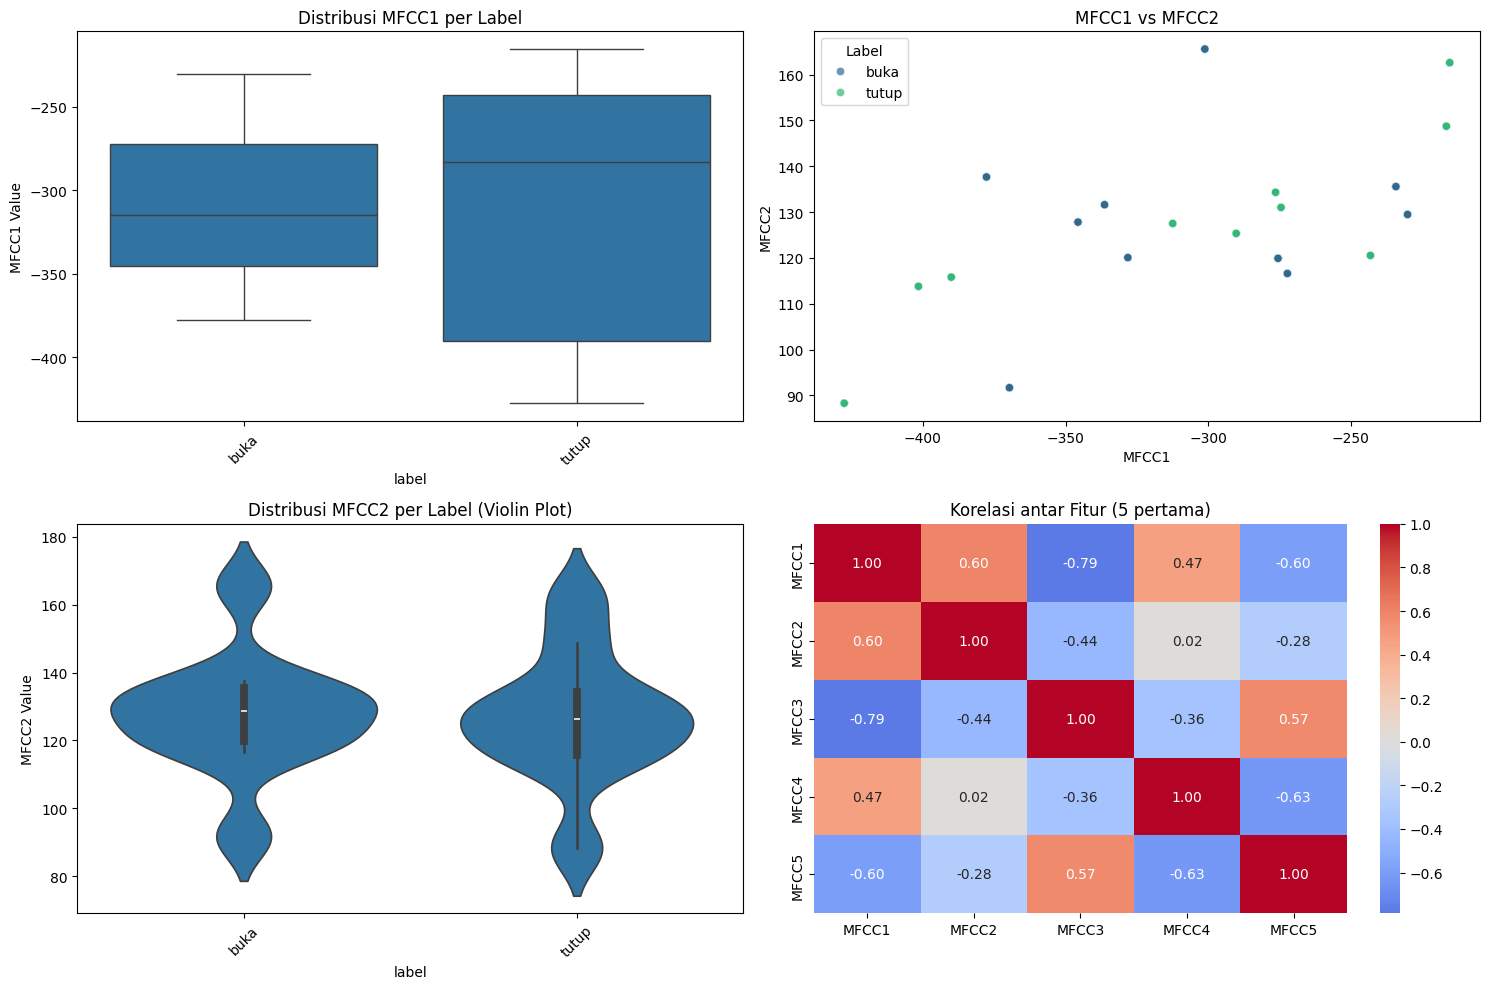


📊 STATISTIK FITUR PER LABEL:
-----------------------------------
MFCC1 Statistics:
       count     mean     std      min      25%      50%      75%      max
label                                                                     
buka   150.0 -307.078  50.326 -377.698 -345.629 -314.663 -272.255 -230.144
tutup  150.0 -304.764  73.231 -427.533 -390.037 -283.286 -243.157 -215.364

📋 INFORMASI FITUR:
   Shape features: (300, 30)
   Jumlah fitur: 30
   Jumlah sample: 300
   Labels: ['buka' 'tutup']

🎯 DISTRIBUSI LABEL:
   buka: 150 samples (50.0%)
   tutup: 150 samples (50.0%)


In [10]:
print("📊 VISUALISASI FEATURES")
print("=" * 40)

# Check if we have features and labels
if 'X' in locals() and 'y' in locals() and len(X) > 0 and len(y) > 0:
    # Create feature DataFrame untuk visualisasi
    # Use first 5 MFCC features + additional features for visualization
    n_mfcc_features = 13  # Assuming we extracted 13 MFCC features
    feature_names = [f'MFCC{i+1}' for i in range(min(5, n_mfcc_features))]
    
    # If we have more than 5 MFCC features, take first 5
    if X.shape[1] > len(feature_names):
        feature_df = pd.DataFrame(X[:, :5], columns=feature_names)
    else:
        feature_df = pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(X.shape[1])])
    
    feature_df['label'] = y

    # Create visualizations
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Plot 1: Distribusi MFCC1 by label
    if 'MFCC1' in feature_df.columns:
        sns.boxplot(data=feature_df, x='label', y='MFCC1', ax=axes[0, 0])
        axes[0, 0].set_title('Distribusi MFCC1 per Label')
        axes[0, 0].set_ylabel('MFCC1 Value')
        axes[0, 0].tick_params(axis='x', rotation=45)
    else:
        axes[0, 0].text(0.5, 0.5, 'MFCC1 tidak tersedia', 
                       horizontalalignment='center', verticalalignment='center',
                       transform=axes[0, 0].transAxes)
        axes[0, 0].set_title('Distribusi MFCC1 per Label')

    # Plot 2: Scatter plot MFCC1 vs MFCC2
    if all(col in feature_df.columns for col in ['MFCC1', 'MFCC2']):
        sns.scatterplot(data=feature_df, x='MFCC1', y='MFCC2', hue='label', 
                       ax=axes[0, 1], alpha=0.7, palette='viridis')
        axes[0, 1].set_title('MFCC1 vs MFCC2')
        axes[0, 1].legend(title='Label')
    else:
        axes[0, 1].text(0.5, 0.5, 'MFCC1/MFCC2 tidak tersedia', 
                       horizontalalignment='center', verticalalignment='center',
                       transform=axes[0, 1].transAxes)
        axes[0, 1].set_title('MFCC1 vs MFCC2')

    # Plot 3: Distribusi MFCC2 by label
    if 'MFCC2' in feature_df.columns:
        sns.violinplot(data=feature_df, x='label', y='MFCC2', ax=axes[1, 0])
        axes[1, 0].set_title('Distribusi MFCC2 per Label (Violin Plot)')
        axes[1, 0].set_ylabel('MFCC2 Value')
        axes[1, 0].tick_params(axis='x', rotation=45)
    else:
        axes[1, 0].text(0.5, 0.5, 'MFCC2 tidak tersedia', 
                       horizontalalignment='center', verticalalignment='center',
                       transform=axes[1, 0].transAxes)
        axes[1, 0].set_title('Distribusi MFCC2 per Label')

    # Plot 4: Correlation heatmap of first 5 features
    if len(feature_df.columns) > 1:
        numeric_cols = feature_df.select_dtypes(include=[np.number]).columns
        if len(numeric_cols) > 1:
            correlation_matrix = feature_df[numeric_cols].corr()
            sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                       ax=axes[1, 1], fmt='.2f')
            axes[1, 1].set_title('Korelasi antar Fitur (5 pertama)')
        else:
            axes[1, 1].text(0.5, 0.5, 'Tidak cukup fitur numerik', 
                           horizontalalignment='center', verticalalignment='center',
                           transform=axes[1, 1].transAxes)
            axes[1, 1].set_title('Korelasi antar Fitur')
    else:
        axes[1, 1].text(0.5, 0.5, 'Tidak cukup kolom untuk korelasi', 
                       horizontalalignment='center', verticalalignment='center',
                       transform=axes[1, 1].transAxes)
        axes[1, 1].set_title('Korelasi antar Fitur')

    plt.tight_layout()
    plt.show()

    # Additional: Feature statistics by label
    print(f"\n📊 STATISTIK FITUR PER LABEL:")
    print("-" * 35)
    
    if 'MFCC1' in feature_df.columns:
        mfcc1_stats = feature_df.groupby('label')['MFCC1'].describe()
        print("MFCC1 Statistics:")
        print(mfcc1_stats.round(3))
    
    # Feature information
    print(f"\n📋 INFORMASI FITUR:")
    print(f"   Shape features: {X.shape}")
    print(f"   Jumlah fitur: {X.shape[1]}")
    print(f"   Jumlah sample: {X.shape[0]}")
    print(f"   Labels: {np.unique(y)}")
    
    # Label distribution
    print(f"\n🎯 DISTRIBUSI LABEL:")
    unique_labels, counts = np.unique(y, return_counts=True)
    for label, count in zip(unique_labels, counts):
        percentage = (count / len(y)) * 100
        print(f"   {label}: {count} samples ({percentage:.1f}%)")

else:
    print("❌ Features (X) dan labels (y) tidak tersedia!")
    print("💡 Pastikan ekstraksi fitur telah berjalan dengan sukses.")
    
    # Check what variables are available
    available_vars = [var for var in ['X', 'y'] if var in locals()]
    print(f"📋 Variabel yang tersedia: {available_vars}")
    
    if 'X' in locals():
        print(f"   X shape: {X.shape if len(X) > 0 else 'empty'}")
    if 'y' in locals():
        print(f"   y shape: {y.shape if len(y) > 0 else 'empty'}")

### 6. Preprocessing & Standardization

⚙️ PREPROCESSING & STANDARDIZATION
🎯 Label mapping: {'buka': 0, 'tutup': 1}
✅ Using 'dataset_type' column for train/val split

📊 DATA SPLIT SUMMARY:
   Training set: 200 samples
   Validation set: 100 samples
   Feature dimension: 30

🎯 LABEL DISTRIBUTION:
   TRAIN: buka: 100 (50.0%)  tutup: 100 (50.0%)  
   VAL:   buka: 50 (50.0%)  tutup: 50 (50.0%)  

📊 FEATURE SCALING:
   Before scaling - Train mean: 64.2069, std: 356.1578
   Before scaling - Val mean: 64.2069, std: 356.1578
   After scaling - Train mean: -0.0000, std: 1.0000
   After scaling - Val mean: -0.0000, std: 1.0000


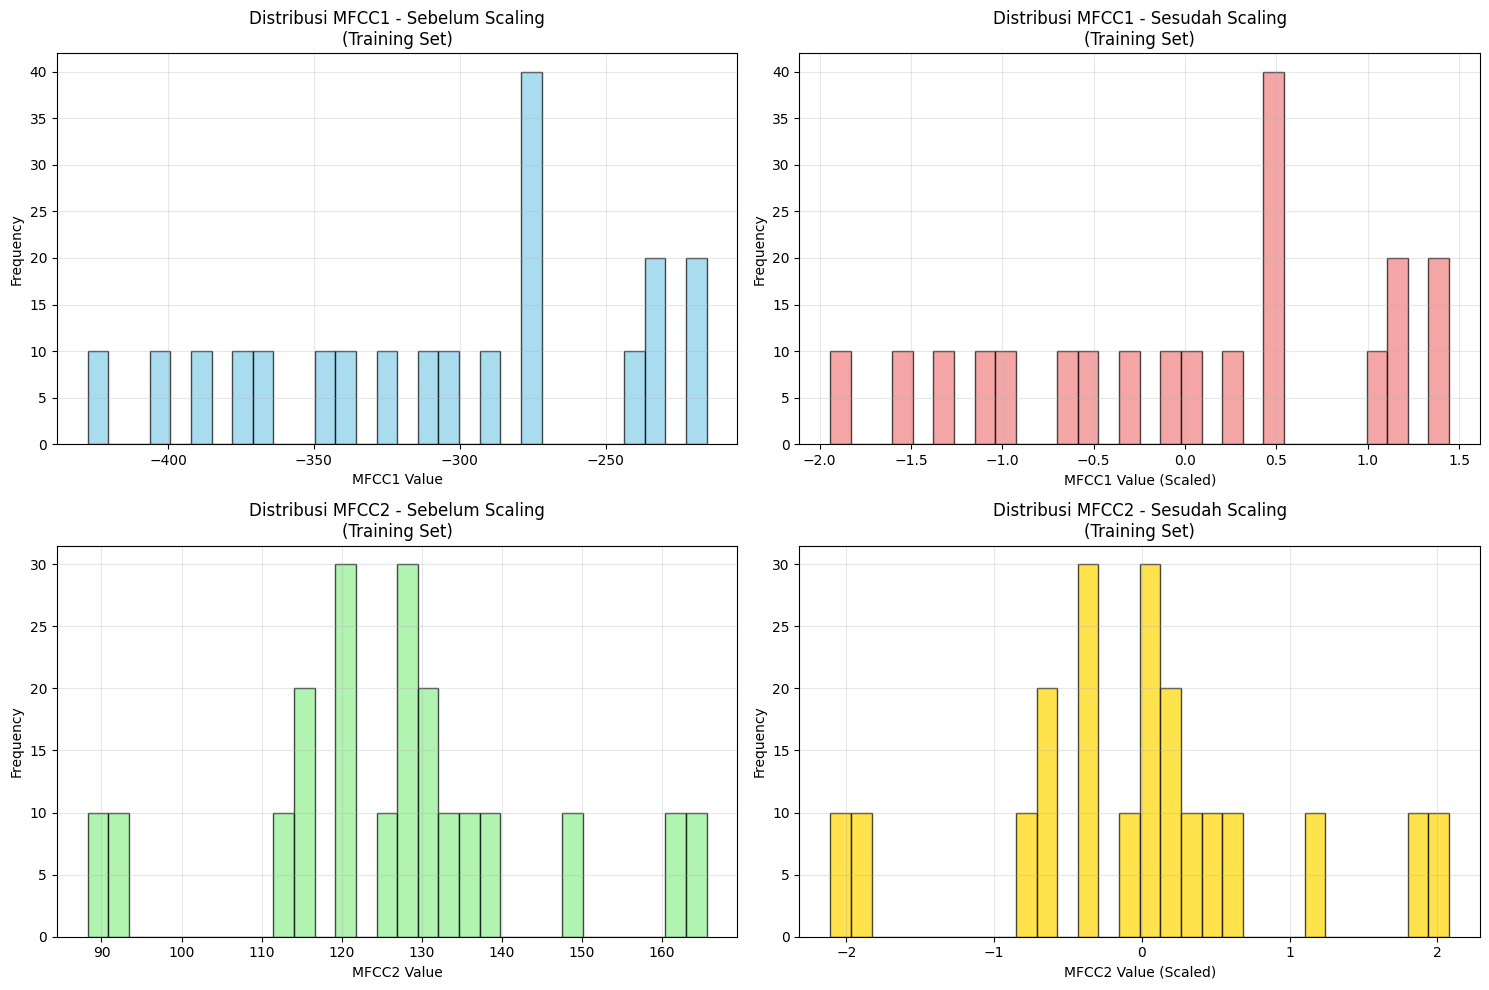


💾 Preprocessing objects saved:
   - label_encoder.pkl
   - scaler.pkl

✅ PREPROCESSING COMPLETED!


In [25]:
print("⚙️ PREPROCESSING & STANDARDIZATION")
print("=" * 40)

# Check available data
if 'X' not in locals() or 'y' not in locals() or len(X) == 0 or len(y) == 0:
    print("❌ Features (X) atau labels (y) tidak tersedia!")
    print("💡 Pastikan ekstraksi fitur telah berjalan dengan sukses.")
else:
    # Encode labels
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)
    
    print(f"🎯 Label mapping: {dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))}")

    # Split data berdasarkan dataset_type dari metadata
    # Pastikan metadata_df memiliki indeks yang sesuai dengan X dan y
    if 'metadata_df' in locals() and len(metadata_df) >= len(X):
        # Use dataset_type column instead of split
        if 'dataset_type' in metadata_df.columns:
            train_mask = metadata_df.iloc[:len(X)]['dataset_type'] == 'train'
            X_train = X[train_mask]
            X_val = X[~train_mask]
            y_train = y_encoded[train_mask]
            y_val = y_encoded[~train_mask]
            
            print(f"✅ Using 'dataset_type' column for train/val split")
        else:
            print("❌ Column 'dataset_type' not found in metadata!")
            print("💡 Available columns:", list(metadata_df.columns))
            
            # Fallback: split manually 80/20
            from sklearn.model_selection import train_test_split
            X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)
            print("✅ Using manual 80/20 train/val split")
    else:
        print("❌ metadata_df tidak tersedia atau tidak sesuai panjangnya dengan X")
        print("💡 Using manual train/test split instead...")
        
        # Fallback: split manually
        from sklearn.model_selection import train_test_split
        X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

    print(f"\n📊 DATA SPLIT SUMMARY:")
    print(f"   Training set: {X_train.shape[0]} samples")
    print(f"   Validation set: {X_val.shape[0]} samples")
    print(f"   Feature dimension: {X_train.shape[1]}")

    # Check label distribution in splits
    if 'y_train' in locals() and 'y_val' in locals():
        print(f"\n🎯 LABEL DISTRIBUTION:")
        train_unique, train_counts = np.unique(y_train, return_counts=True)
        val_unique, val_counts = np.unique(y_val, return_counts=True)
        
        print(f"   TRAIN: ", end="")
        for label, count in zip(train_unique, train_counts):
            original_label = label_encoder.inverse_transform([label])[0]
            percentage = (count / len(y_train)) * 100
            print(f"{original_label}: {count} ({percentage:.1f}%)  ", end="")
        print()
        
        print(f"   VAL:   ", end="")
        for label, count in zip(val_unique, val_counts):
            original_label = label_encoder.inverse_transform([label])[0]
            percentage = (count / len(y_val)) * 100
            print(f"{original_label}: {count} ({percentage:.1f}%)  ", end="")
        print()

    # Standardize features
    print(f"\n📊 FEATURE SCALING:")
    print(f"   Before scaling - Train mean: {X_train.mean():.4f}, std: {X_train.std():.4f}")
    print(f"   Before scaling - Val mean: {X_val.mean():.4f}, std: {X_val.std():.4f}")

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    print(f"   After scaling - Train mean: {X_train_scaled.mean():.4f}, std: {X_train_scaled.std():.4f}")
    print(f"   After scaling - Val mean: {X_val_scaled.mean():.4f}, std: {X_val_scaled.std():.4f}")

    # Visualisasi sebelum dan sesudah scaling
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Before scaling - MFCC1
    if X_train.shape[1] > 0:
        axes[0, 0].hist(X_train[:, 0], alpha=0.7, bins=30, color='skyblue', edgecolor='black')
        axes[0, 0].set_title('Distribusi MFCC1 - Sebelum Scaling\n(Training Set)')
        axes[0, 0].set_xlabel('MFCC1 Value')
        axes[0, 0].set_ylabel('Frequency')
        axes[0, 0].grid(True, alpha=0.3)

    # After scaling - MFCC1
    axes[0, 1].hist(X_train_scaled[:, 0], alpha=0.7, bins=30, color='lightcoral', edgecolor='black')
    axes[0, 1].set_title('Distribusi MFCC1 - Sesudah Scaling\n(Training Set)')
    axes[0, 1].set_xlabel('MFCC1 Value (Scaled)')
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].grid(True, alpha=0.3)

    # Before scaling - MFCC2
    if X_train.shape[1] > 1:
        axes[1, 0].hist(X_train[:, 1], alpha=0.7, bins=30, color='lightgreen', edgecolor='black')
        axes[1, 0].set_title('Distribusi MFCC2 - Sebelum Scaling\n(Training Set)')
        axes[1, 0].set_xlabel('MFCC2 Value')
        axes[1, 0].set_ylabel('Frequency')
        axes[1, 0].grid(True, alpha=0.3)

    # After scaling - MFCC2
    if X_train_scaled.shape[1] > 1:
        axes[1, 1].hist(X_train_scaled[:, 1], alpha=0.7, bins=30, color='gold', edgecolor='black')
        axes[1, 1].set_title('Distribusi MFCC2 - Sesudah Scaling\n(Training Set)')
        axes[1, 1].set_xlabel('MFCC2 Value (Scaled)')
        axes[1, 1].set_ylabel('Frequency')
        axes[1, 1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Save preprocessing objects for later use
    try:
        joblib.dump(label_encoder, 'label_encoder.pkl')
        joblib.dump(scaler, 'scaler.pkl')
        print(f"\n💾 Preprocessing objects saved:")
        print(f"   - label_encoder.pkl")
        print(f"   - scaler.pkl")
    except Exception as e:
        print(f"❌ Error saving preprocessing objects: {e}")

    print(f"\n✅ PREPROCESSING COMPLETED!")

### 7. Save Preprocessed Data

In [26]:
import os
import joblib
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt

# Pastikan folder penyimpanan ada
save_dir = "data/preprocessed"
os.makedirs(save_dir, exist_ok=True)

print("⚙️ PREPROCESSING & STANDARDIZATION")
print("=" * 40)

if 'X' not in locals() or 'y' not in locals() or len(X) == 0 or len(y) == 0:
    print("❌ Features (X) atau labels (y) tidak tersedia!")
    print("💡 Pastikan ekstraksi fitur telah berjalan dengan sukses.")
else:
    # 1️⃣ Encode labels
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)
    print(f"🎯 Label mapping: {dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))}")

    # 2️⃣ Split train/validation
    if 'metadata_df' in locals() and len(metadata_df) >= len(X):
        if 'dataset_type' in metadata_df.columns:
            train_mask = metadata_df.iloc[:len(X)]['dataset_type'] == 'train'
            X_train = X[train_mask]
            X_val = X[~train_mask]
            y_train = y_encoded[train_mask]
            y_val = y_encoded[~train_mask]
            print(f"✅ Using 'dataset_type' column for train/val split")
        else:
            print("❌ Column 'dataset_type' not found. Using manual 80/20 split.")
            from sklearn.model_selection import train_test_split
            X_train, X_val, y_train, y_val = train_test_split(
                X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)
    else:
        print("❌ metadata_df tidak tersedia atau tidak sesuai panjangnya dengan X")
        print("💡 Using manual train/test split instead...")
        from sklearn.model_selection import train_test_split
        X_train, X_val, y_train, y_val = train_test_split(
            X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

    print(f"\n📊 DATA SPLIT SUMMARY:")
    print(f"   Training set: {X_train.shape[0]} samples")
    print(f"   Validation set: {X_val.shape[0]} samples")
    print(f"   Feature dimension: {X_train.shape[1]}")

    # 3️⃣ Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    print(f"\n📊 FEATURE SCALING:")
    print(f"   Train mean: {X_train_scaled.mean():.4f}, std: {X_train_scaled.std():.4f}")
    print(f"   Val mean: {X_val_scaled.mean():.4f}, std: {X_val_scaled.std():.4f}")

    # 4️⃣ Save preprocessing objects and data
    print("\n💾 SAVING PREPROCESSED DATA")
    print("=" * 40)

    try:
        # Save encoders and scalers
        joblib.dump(scaler, os.path.join(save_dir, 'scaler.pkl'))
        joblib.dump(label_encoder, os.path.join(save_dir, 'label_encoder.pkl'))

        # Save processed arrays
        np.save(os.path.join(save_dir, 'X_train.npy'), X_train_scaled)
        np.save(os.path.join(save_dir, 'X_val.npy'), X_val_scaled)
        np.save(os.path.join(save_dir, 'y_train.npy'), y_train)
        np.save(os.path.join(save_dir, 'y_val.npy'), y_val)

        print("✅ Preprocessed data saved successfully!")
        print(f"\n📁 FILES SAVED IN '{save_dir}':")
        print(f"   ├── X_train.npy: {X_train_scaled.shape}")
        print(f"   ├── X_val.npy: {X_val_scaled.shape}") 
        print(f"   ├── y_train.npy: {y_train.shape}")
        print(f"   ├── y_val.npy: {y_val.shape}")
        print(f"   ├── scaler.pkl")
        print(f"   └── label_encoder.pkl")

        # Summary info
        print(f"\n🔤 CLASSES MAPPING: {dict(zip(range(len(label_encoder.classes_)), label_encoder.classes_))}")

        print(f"\n💽 FILE SIZES:")
        for file in os.listdir(save_dir):
            size_kb = os.path.getsize(os.path.join(save_dir, file)) / 1024
            print(f"   {file}: {size_kb:.2f} KB")

        print(f"\n🚀 READY FOR MODELING!")

    except Exception as e:
        print(f"❌ Error saving preprocessed data: {e}")


⚙️ PREPROCESSING & STANDARDIZATION
🎯 Label mapping: {'buka': 0, 'tutup': 1}
✅ Using 'dataset_type' column for train/val split

📊 DATA SPLIT SUMMARY:
   Training set: 200 samples
   Validation set: 100 samples
   Feature dimension: 30

📊 FEATURE SCALING:
   Train mean: -0.0000, std: 1.0000
   Val mean: -0.0000, std: 1.0000

💾 SAVING PREPROCESSED DATA
✅ Preprocessed data saved successfully!

📁 FILES SAVED IN 'data/preprocessed':
   ├── X_train.npy: (200, 30)
   ├── X_val.npy: (100, 30)
   ├── y_train.npy: (200,)
   ├── y_val.npy: (100,)
   ├── scaler.pkl
   └── label_encoder.pkl

🔤 CLASSES MAPPING: {0: 'buka', 1: 'tutup'}

💽 FILE SIZES:
   label_encoder.pkl: 0.36 KB
   scaler.pkl: 1.30 KB
   X_train.npy: 47.00 KB
   X_val.npy: 23.56 KB
   y_train.npy: 1.69 KB
   y_val.npy: 0.91 KB

🚀 READY FOR MODELING!


## Modelling Suara Buka Tutup & Deployment
### 1. Import Libraries & Load Data

In [28]:
import numpy as np
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

print("Libraries imported successfully")

# Path folder tempat menyimpan hasil preprocessing
preprocessed_path = 'data/preprocessed/'

# Load preprocessed data
X_train_scaled = np.load(preprocessed_path + 'X_train.npy')
X_val_scaled = np.load(preprocessed_path + 'X_val.npy')
y_train = np.load(preprocessed_path + 'y_train.npy')
y_val = np.load(preprocessed_path + 'y_val.npy')

# Load preprocessing objects
label_encoder = joblib.load(preprocessed_path + 'label_encoder.pkl')

print(f"Training data: {X_train_scaled.shape}")
print(f"Validation data: {X_val_scaled.shape}")
print(f"Classes: {list(label_encoder.classes_)}")

# Train model and make predictions
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)
y_val_pred = model.predict(X_val_scaled)

# Classification report
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred, target_names=label_encoder.classes_))


Libraries imported successfully
Training data: (200, 30)
Validation data: (100, 30)
Classes: ['buka', 'tutup']

Classification Report:
              precision    recall  f1-score   support

        buka       1.00      1.00      1.00        50
       tutup       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



### 2. Train Random Forest Model

In [29]:
print("Training Random Forest Model")
print("=" * 40)

# Initialize Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

# Train model
rf_model.fit(X_train_scaled, y_train)

print("Model training completed")
print(f"Number of trees: {len(rf_model.estimators_)}")

Training Random Forest Model
Model training completed
Number of trees: 100


### 3. Model Evaluation

In [30]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

print("Model Evaluation")
print("=" * 40)

# Predictions
y_train_pred = rf_model.predict(X_train_scaled)
y_val_pred = rf_model.predict(X_val_scaled)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Cross-validation
cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

Model Evaluation
Training Accuracy: 1.0000
Validation Accuracy: 1.0000
Cross-validation scores: [1.   0.75 0.75 1.   1.  ]
Mean CV Accuracy: 0.9000 (+/- 0.2449)


### 4. Visualisasi Performance

Performance Visualization


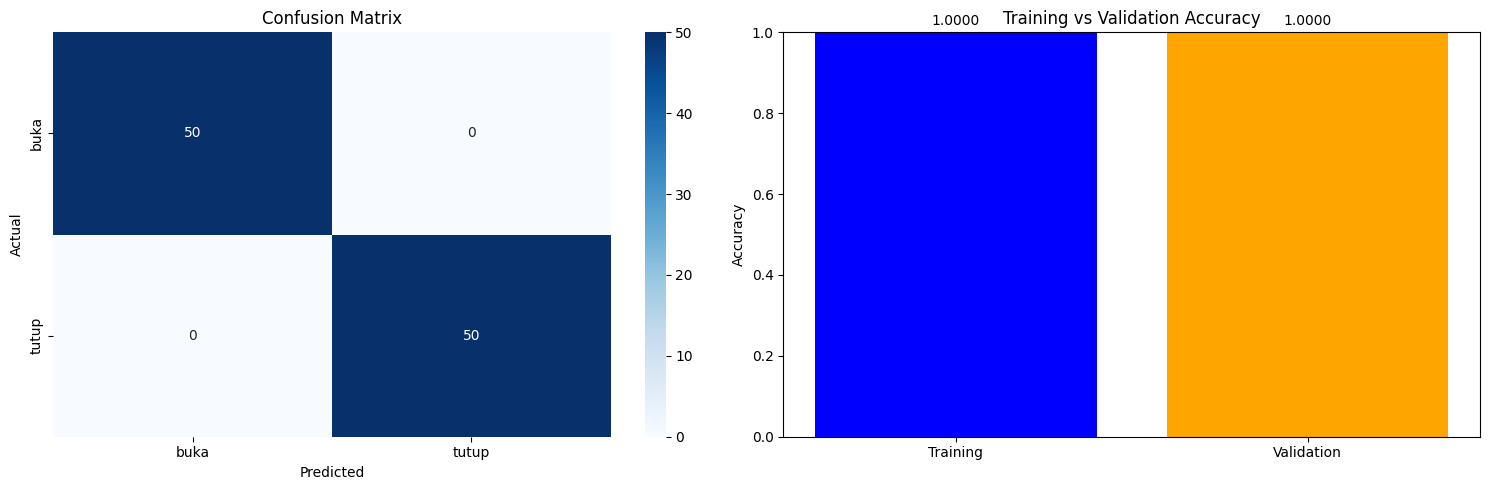

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

print("Performance Visualization")
print("=" * 40)

# Hitung prediksi dan akurasi
y_val_pred = rf_model.predict(X_val_scaled)
train_accuracy = rf_model.score(X_train_scaled, y_train)
val_accuracy = rf_model.score(X_val_scaled, y_val)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Confusion Matrix
cm = confusion_matrix(y_val, y_val_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_, ax=ax1)
ax1.set_title('Confusion Matrix')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

# Accuracy Comparison
accuracies = [train_accuracy, val_accuracy]
labels = ['Training', 'Validation']
bars = ax2.bar(labels, accuracies, color=['blue', 'orange'])
ax2.set_title('Training vs Validation Accuracy')
ax2.set_ylabel('Accuracy')
ax2.set_ylim(0, 1)

# Add value labels on bars
for bar, accuracy in zip(bars, accuracies):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{accuracy:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


### 5. Feature Importance Analysis

Performance Visualization


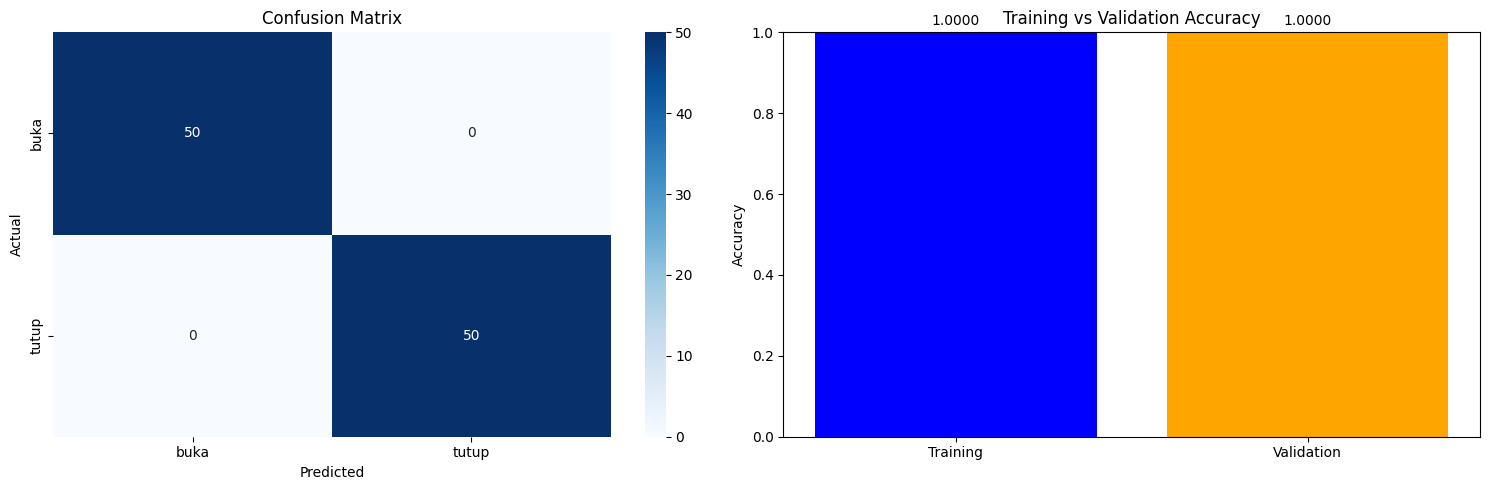

In [33]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("Performance Visualization")
print("=" * 40)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Confusion Matrix
cm = confusion_matrix(y_val, y_val_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_, ax=ax1)
ax1.set_title('Confusion Matrix')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

# Accuracy Comparison
accuracies = [train_accuracy, val_accuracy]
labels = ['Training', 'Validation']
bars = ax2.bar(labels, accuracies, color=['blue', 'orange'])
ax2.set_title('Training vs Validation Accuracy')
ax2.set_ylabel('Accuracy')
ax2.set_ylim(0, 1)

# Add value labels on bars
for bar, accuracy in zip(bars, accuracies):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{accuracy:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

### 6. Detailed Classification Report

In [38]:
import numpy as np
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

print("Libraries imported successfully")
preprocessed_path = 'data/preprocessed/'

# Load preprocessed data
X_train_scaled = np.load(preprocessed_path + 'X_train.npy')
X_val_scaled = np.load(preprocessed_path + 'X_val.npy')
y_train = np.load(preprocessed_path + 'y_train.npy')
y_val = np.load(preprocessed_path + 'y_val.npy')


# Load preprocessing objects
label_encoder = joblib.load(preprocessed_path + 'label_encoder.pkl')

print(f"Training data: {X_train_scaled.shape}")
print(f"Validation data: {X_val_scaled.shape}")
print(f"Classes: {list(label_encoder.classes_)}")

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_val_pred = model.predict(X_val_scaled)

# Classification report
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred, target_names=label_encoder.classes_))

Libraries imported successfully
Training data: (200, 30)
Validation data: (100, 30)
Classes: ['buka', 'tutup']

Classification Report:
              precision    recall  f1-score   support

        buka       1.00      1.00      1.00        50
       tutup       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



### 7.  Save Model

In [39]:
print("Saving Model")
print("=" * 40)

# Save the trained model
joblib.dump(rf_model, 'random_forest_model.pkl')

print("Model saved as 'random_forest_model.pkl'")
print("Model training and evaluation completed successfully")

# Final summary
print("\nModel Training Summary:")
print(f"Feature Space: {X_train_scaled.shape[1]} features")
print(f"Training Samples: {X_train_scaled.shape[0]}")
print(f"Validation Samples: {X_val_scaled.shape[0]}")
print(f"Classes: {list(label_encoder.classes_)}")

Saving Model
Model saved as 'random_forest_model.pkl'
Model training and evaluation completed successfully

Model Training Summary:
Feature Space: 30 features
Training Samples: 200
Validation Samples: 100
Classes: ['buka', 'tutup']
